In [3]:
import matplotlib as mpl
mpl.rcParams.update({'font.size': 12})
mpl.rcParams['axes.formatter.useoffset'] = False
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable

import cmcrameri.cm as cm
import utils.load_grid as lg

from proteus.utils.constants import R_earth, M_earth

from proteus.plot.cpl_population import _get_mr_data
mrdata = _get_mr_data(os.environ.get("FWL_DATA"))

%matplotlib widget

In [15]:
def load_grid(pgrid_dir):
    cases = lg.get_cases(pgrid_dir)
    ncases = len(cases)

    # Helpfiles
    helps, hvars = lg.load_helpfiles(cases)

    # Case numbers
    cnums = ["%d"%int(s.split("_")[-1]) for s in cases]

    # Statuses
    statuses = lg.get_statuses(pgrid_dir)

    out = {
        "status": statuses,
        "cnums": cnums,
        "helps": helps,
        "hvars": hvars,
        "ncases": ncases,
        "dir": pgrid_dir
    }

    return out

In [16]:
noh_b = load_grid("data/output/NOH_b")
obs_b = {
    "Demangeon+21": [[0.40, 0.16, 0.15], [0.85, 0.061, 0.047]],
    "Rajpaul+24":   [[0.47, 0.13, 0.15], []],
    "Cloutier+19":  [[1.01, 0.0,  1.01], [0.80, 0.05, 0.05 ]],
}

Helpfiles:   0%|          | 0/100 [00:00<?, ?it/s]

Helpfiles: 100%|██████████| 100/100 [00:01<00:00, 90.80it/s]


In [17]:
noh_c = load_grid("data/output/NOH_c")
obs_c =  {
    "Demangeon+21": [[2.22, 0.26, 0.25], [1.385, 0.095, 0.075]],
    "Rajpaul+24":   [[2.25, 0.24, 0.25], []],
    "Luque+22":     [[2.42, 0.35, 0.34], [1.34, 0.07, 0.07]],
    "Cloutier+19":  [[2.42, 0.35, 0.34], [1.35, 0.07, 0.07 ]],
}

Helpfiles:   0%|          | 0/100 [00:00<?, ?it/s]

Helpfiles: 100%|██████████| 100/100 [00:01<00:00, 98.11it/s]


In [18]:
noh_d = load_grid("data/output/NOH_d")
obs_d =  {
    "Demangeon+21": [[1.94, 0.28, 0.28], [1.521, 0.119, 0.098]],
    "Rajpaul+24":   [[2.14, 0.25, 0.29], []],
    "Luque+22":     [[2.31, 0.46, 0.45], [1.58, 0.08, 0.08 ]],
    "Cloutier+19":  [[2.31, 0.46, 0.45], [1.57, 0.14, 0.14]],
}

Helpfiles:   0%|          | 0/100 [00:00<?, ?it/s]

Helpfiles: 100%|██████████| 100/100 [00:01<00:00, 99.50it/s]


data/output/NOH_b
    x = 0.470094 ± 4.31686e-06
    y = 0.737825 ± 0.00406197
data/output/NOH_c
    x = 2.25046 ± 2.11343e-05
    y = 1.23461 ± 0.00606304
data/output/NOH_d
    x = 2.14044 ± 2.01076e-05
    y = 1.21451 ± 0.00599375


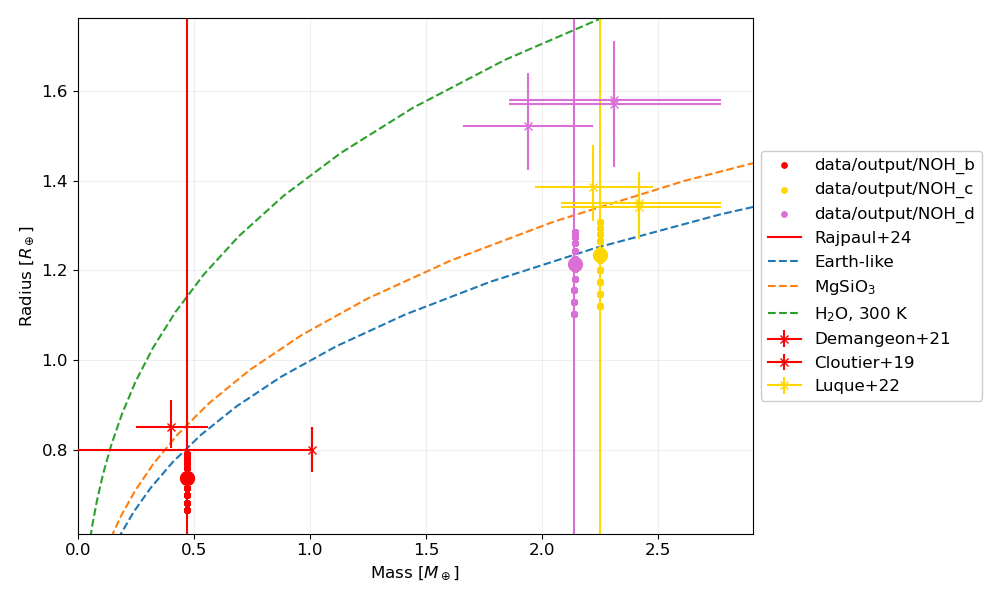

In [61]:
# parameters
jitter      = 0.025
only_done   = True
cmap        = cm.batlow
cmap.set_under('cyan')
cmap.set_over('magenta')

# make figure
fig,ax = plt.subplots(1,1, figsize=(10,6))
ax.autoscale(enable=True)
ax.set_xlabel(r"Mass [$M_\oplus$]")
ax.set_ylabel(r"Radius [$R_\oplus$]")

# plot grid
cols = ("red","gold","orchid")
for i,pl in enumerate((noh_b, noh_c, noh_d)):

    lbl   = pl["dir"]
    print(lbl)

    # get data from this grid
    hvars = pl["hvars"]
    grd_x = lg.access_hvars(hvars,"M_tot",-1) / M_earth
    # grd_y = (lg.access_hvars(hvars,"z_obs",-1) + lg.access_hvars(hvars,"R_int",-1)) / R_earth
    grd_y = lg.access_hvars(hvars,"R_int",-1) / R_earth
    stats = pl["status"]

    # only show completed cases
    plt_x = []
    plt_y = []
    for j in range(len(grd_x)):
        if 10 <= stats[j] <= 19:
            plt_x.append(grd_x[j])
            plt_y.append(grd_y[j])

    # plot results
    ax.scatter(plt_x, plt_y, label=lbl, zorder=6, s=15, marker='o', color=cols[i])

    # statistics
    med_x = np.median(grd_x)
    err_x = np.std(grd_x) / np.sqrt(len(grd_x))
    print("    x = %g ± %g"%(med_x, err_x))
    med_y = np.median(grd_y)
    err_y = np.std(grd_y) / np.sqrt(len(grd_y))
    print("    y = %g ± %g"%(med_y, err_y))
    ax.errorbar(med_x, med_y, xerr=[err_x], yerr=[err_y], color=cols[i], marker='o', markersize=10)

# Plot observations
obs_leg_vals = []
for i,obs in enumerate((obs_b, obs_c, obs_d)):
    for k in obs.keys():
        _m = obs[k][0]
        _r = obs[k][1]
        _c = cols[i]
        _l = k

        if _l in obs_leg_vals:
            _l = ""
        else:
            obs_leg_vals.append(_l)

        if len(_m)+len(_r) == 6:
            # mass and radius
            ax.errorbar(_m[0],_r[0],
                        xerr=[[_m[2]],[_m[1]]], yerr=[[_r[2]],[_r[1]]],
                        marker='x', label=_l, zorder=4, color=_c)

        elif len(_m) == 0:
            # no mass
            ax.axhline(_r[0], label=_l, c=_c)

        elif len(_r) == 0:
            # no radius
            ax.axvline(_m[0], label=_l, c=_c)

ax.set_xlim(left=0)
# ax.set_ylim(bottom=0.6, top=1.6)

# Plot reference data
ax.autoscale(enable=False)
for k in mrdata.keys():
    if '1000 K' in k:
        continue
    ax.plot(mrdata[k][0],mrdata[k][1], label=k, linestyle='dashed',zorder=0)

ax.grid(zorder=0, alpha=0.2)
ax.legend(framealpha=1.0, loc='center left', bbox_to_anchor=(1,0.5))
fig.tight_layout()
plt.show()